In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [2]:
conn = sqlite3.connect('nfl.db')
cursor = conn.cursor()

teams_df = pd.read_sql_query("SELECT * FROM Teams", conn)
games_df = pd.read_sql_query("SELECT * FROM Games", conn)
playerstats_df = pd.read_sql_query("SELECT * FROM PlayerStats", conn)

conn.close()

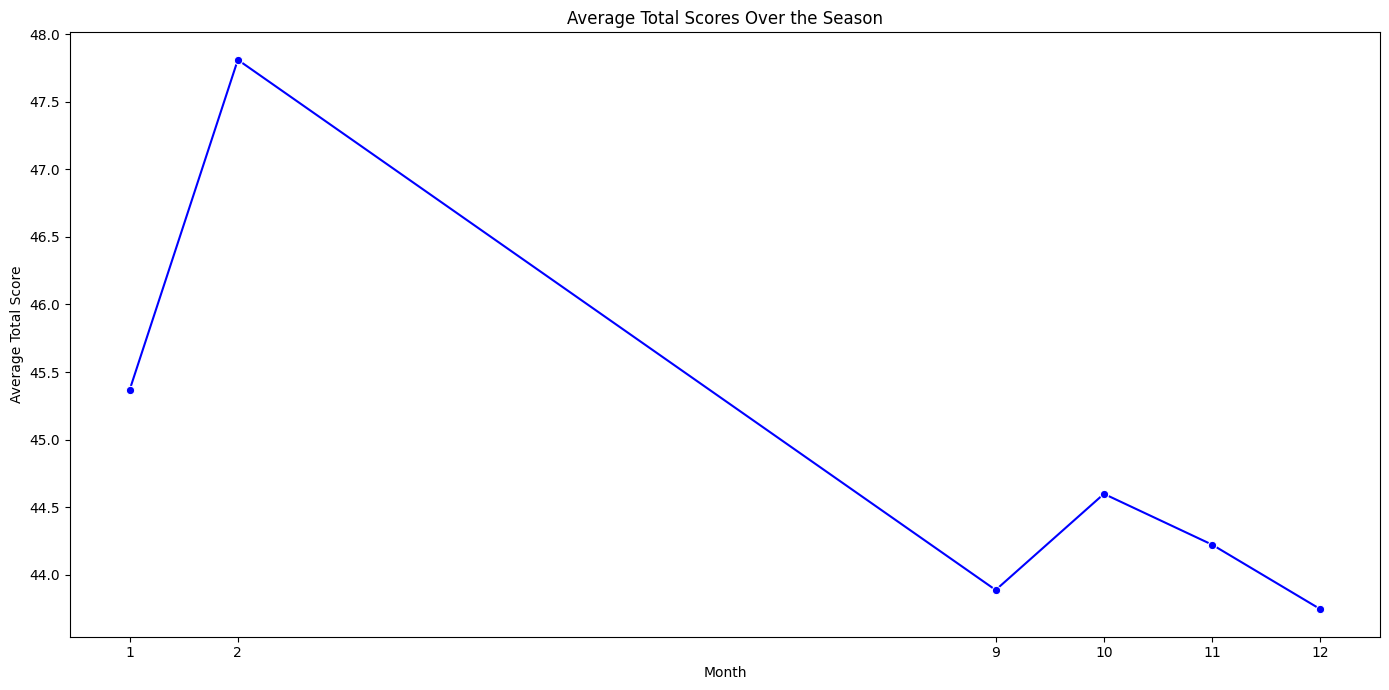

In [3]:
# Scoring Trends Over the Season
games_df['date'] = pd.to_datetime(games_df['date'])
games_df['month'] = games_df['date'].dt.month
monthly_scores = games_df.groupby('month')[['home_score', 'away_score']].mean().reset_index()
monthly_scores['total_score'] = monthly_scores['home_score'] + monthly_scores['away_score']

plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='total_score', data=monthly_scores, marker='o', color='blue')
plt.title('Average Total Scores Over the Season')
plt.xlabel('Month')
plt.ylabel('Average Total Score')
plt.xticks(monthly_scores['month'])
plt.tight_layout()

# Save visualization
# plt.savefig('seasonal_scoring_trends.png')
plt.show()

# Before 06/30/2024

In [1]:
### Final 

import pandas as pd

# Load data
games_df = pd.read_csv('../Database/data/games.csv') # Replace with your data file path

# Filter to include only the 2023 season
games_2023 = games_df[games_df['season'] == 2023]

# Calculate average points scored for each team at home and away
avg_points_scored_home = games_2023.groupby('home_team')['home_score'].mean()
avg_points_scored_away = games_2023.groupby('away_team')['away_score'].mean()

# Combine to get overall averages
avg_points = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1)
avg_points.columns = ['Avg Home Points', 'Avg Away Points']

# Display average points
print("Average Points per Game for NFL Teams in 2023 Season:")
print(avg_points)


Average Points per Game for NFL Teams in 2023 Season:
     Avg Home Points  Avg Away Points
ARI        24.000000        13.375000
ATL        24.000000        13.571429
BAL        31.571429        24.500000
BUF        28.625000        24.857143
CAR        15.285714        16.125000
CHI        23.142857        19.000000
CIN        22.750000        19.428571
CLE        22.333333        25.857143
DAL        39.857143        21.500000
DEN        23.250000        20.142857
DET        30.571429        24.750000
GB         19.714286        24.375000
HOU        24.375000        19.000000
IND        27.000000        20.625000
JAX        20.125000        24.285714
KC         22.500000        21.857143
LAC        22.750000        20.428571
LAR        23.875000        23.714286
LVR        22.750000        14.714286
MIA        34.125000        27.142857
MIN        20.571429        21.250000
NE         13.250000        15.142857
NO         21.857143        22.250000
NYG        10.166667        17.000

In [2]:
import pandas as pd

# Load the data from the uploaded file
file_path = '../Database/data/games.csv'  # Replace with the path to your games.csv file
games_df = pd.read_csv(file_path)

# Filter to include only the 2023 season
games_2023 = games_df[games_df['season'] == 2023]

# Calculate average points scored for each team at home and away
avg_points_scored_home = games_2023.groupby('home_team')['home_score'].mean()
avg_points_scored_away = games_2023.groupby('away_team')['away_score'].mean()

# Calculate average points allowed for each team at home and away
avg_points_allowed_home = games_2023.groupby('home_team')['away_score'].mean()
avg_points_allowed_away = games_2023.groupby('away_team')['home_score'].mean()

# Combine to get overall averages for points scored
avg_points_scored = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1)
avg_points_scored.columns = ['Avg Home Points Scored', 'Avg Away Points Scored']

# Combine to get overall averages for points allowed
avg_points_allowed = pd.concat([avg_points_allowed_home, avg_points_allowed_away], axis=1)
avg_points_allowed.columns = ['Avg Home Points Allowed', 'Avg Away Points Allowed']

# Display average points scored and allowed
print("Average Points per Game for NFL Teams in 2023 Season (Scored):")
print(avg_points_scored)
print("\nAverage Points per Game for NFL Teams in 2023 Season (Allowed):")
print(avg_points_allowed)


Average Points per Game for NFL Teams in 2023 Season (Scored):
     Avg Home Points Scored  Avg Away Points Scored
ARI               24.000000               13.375000
ATL               24.000000               13.571429
BAL               31.571429               24.500000
BUF               28.625000               24.857143
CAR               15.285714               16.125000
CHI               23.142857               19.000000
CIN               22.750000               19.428571
CLE               22.333333               25.857143
DAL               39.857143               21.500000
DEN               23.250000               20.142857
DET               30.571429               24.750000
GB                19.714286               24.375000
HOU               24.375000               19.000000
IND               27.000000               20.625000
JAX               20.125000               24.285714
KC                22.500000               21.857143
LAC               22.750000               20.428571
L

In [ ]:
# Mine Final

import pandas as pd

def predict_total_score(team1, team2, games_df):
    # Filter to include only the 2023 season
    games_2023 = games_df[games_df['season'] == 2023]

    # Calculate average points scored for each team
    avg_points_scored_home = games_2023.groupby('home_team')['home_score'].mean()
    avg_points_scored_away = games_2023.groupby('away_team')['away_score'].mean()
    
    print("Average points scored at home by each team:")
    print(avg_points_scored_home)
    
    print("Average points scored away by each team:")
    print(avg_points_scored_away)

    # Calculate average points allowed by each team's defense
    avg_points_allowed_home = games_2023.groupby('home_team')['away_score'].mean()
    avg_points_allowed_away = games_2023.groupby('away_team')['home_score'].mean()
    
    print("Average points allowed at home by each team's defense:")
    print(avg_points_allowed_home)
    
    print("Average points allowed away by each team's defense:")
    print(avg_points_allowed_away)

    # Combine to get overall averages
    avg_points_scored = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1).mean(axis=1)
    avg_points_allowed = pd.concat([avg_points_allowed_home, avg_points_allowed_away], axis=1).mean(axis=1)
    
    print("Overall average points scored by each team:")
    print(avg_points_scored)
    
    print("Overall average points allowed by each team's defense:")
    print(avg_points_allowed)

    # Predict total score for the matchup
    team1_score = (avg_points_scored.get(team1, 0) + avg_points_allowed.get(team2, 0)) / 2
    team2_score = (avg_points_scored.get(team2, 0) + avg_points_allowed.get(team1, 0)) / 2

    print(f"Predicted score for {team1}: {team1_score}")
    print(f"Predicted score for {team2}: {team2_score}")

    total_score_prediction = team1_score + team2_score
    return total_score_prediction

# Load data
games_df = pd.read_csv('../Database/data/games.csv') # Replace with your data file path

# Example usage
team1 = 'DAL'  # Replace with the first team
team2 = 'PHI'  # Replace with the second team

predicted_score = predict_total_score(team1, team2, games_df)
print(f"Predicted Total Score for {team1} vs {team2}: {predicted_score}")


In [6]:
import pandas as pd

def calculate_avg_points(games_df):
    # Filter to include only the 2023 season
    games_2023 = games_df[games_df['season'] == 2023]

    # Calculate average points scored for each team at home and away
    avg_points_scored_home = games_2023.groupby('home_team')['home_score'].mean()
    avg_points_scored_away = games_2023.groupby('away_team')['away_score'].mean()

    # Combine to get overall averages
    avg_points = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1)
    avg_points.columns = ['Avg Home Points', 'Avg Away Points']

    return avg_points

# Load data
games_df = pd.read_csv('../Database/data/games.csv') # Replace with your data file path

# Calculate and display average points
average_points = calculate_avg_points(games_df)
print("Average Points per Game for NFL Teams in 2023 Season:")
print(average_points)


Average Points per Game for NFL Teams in 2023 Season:
     Avg Home Points  Avg Away Points
ARI        24.000000        13.375000
ATL        24.000000        13.571429
BAL        31.571429        24.500000
BUF        28.625000        24.857143
CAR        15.285714        16.125000
CHI        23.142857        19.000000
CIN        22.750000        19.428571
CLE        22.333333        25.857143
DAL        39.857143        21.500000
DEN        23.250000        20.142857
DET        30.571429        24.750000
GB         19.714286        24.375000
HOU        24.375000        19.000000
IND        27.000000        20.625000
JAX        20.125000        24.285714
KC         22.500000        21.857143
LAC        22.750000        20.428571
LAR        23.875000        23.714286
LVR        22.750000        14.714286
MIA        34.125000        27.142857
MIN        20.571429        21.250000
NE         13.250000        15.142857
NO         21.857143        22.250000
NYG        10.166667        17.000

In [5]:
import pandas as pd

def predict_total_score(team1, team2, games_df):
    # Filter to include only the 2023 season
    games_2023 = games_df[games_df['season'] == 2023]

    # Calculate average points scored for each team
    avg_points_scored_home = games_2023.groupby('home_team')['home_score'].mean()
    avg_points_scored_away = games_2023.groupby('away_team')['away_score'].mean()
    
    print("Average points scored at home by each team:")
    print(avg_points_scored_home)
    
    print("Average points scored away by each team:")
    print(avg_points_scored_away)

    # Calculate average points allowed by each team's defense
    avg_points_allowed_home = games_2023.groupby('home_team')['away_score'].mean()
    avg_points_allowed_away = games_2023.groupby('away_team')['home_score'].mean()
    
    print("Average points allowed at home by each team's defense:")
    print(avg_points_allowed_home)
    
    print("Average points allowed away by each team's defense:")
    print(avg_points_allowed_away)

    # Combine to get overall averages
    avg_points_scored = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1).mean(axis=1)
    avg_points_allowed = pd.concat([avg_points_allowed_home, avg_points_allowed_away], axis=1).mean(axis=1)
    
    print("Overall average points scored by each team:")
    print(avg_points_scored)
    
    print("Overall average points allowed by each team's defense:")
    print(avg_points_allowed)

    # Predict total score for the matchup
    team1_score = (avg_points_scored.get(team1, 0) + avg_points_allowed.get(team2, 0)) / 2
    team2_score = (avg_points_scored.get(team2, 0) + avg_points_allowed.get(team1, 0)) / 2

    print(f"Predicted score for {team1}: {team1_score}")
    print(f"Predicted score for {team2}: {team2_score}")

    total_score_prediction = team1_score + team2_score
    return total_score_prediction

# Load data
games_df = pd.read_csv('../Database/data/games.csv') # Replace with your data file path

# Example usage
team1 = 'DAL'  # Replace with the first team
team2 = 'PHI'  # Replace with the second team

predicted_score = predict_total_score(team1, team2, games_df)
print(f"Predicted Total Score for {team1} vs {team2}: {predicted_score}")


Average points scored at home by each team:
home_team
ARI    24.000000
ATL    24.000000
BAL    31.571429
BUF    28.625000
CAR    15.285714
CHI    23.142857
CIN    22.750000
CLE    22.333333
DAL    39.857143
DEN    23.250000
DET    30.571429
GB     19.714286
HOU    24.375000
IND    27.000000
JAX    20.125000
KC     22.500000
LAC    22.750000
LAR    23.875000
LVR    22.750000
MIA    34.125000
MIN    20.571429
NE     13.250000
NO     21.857143
NYG    10.166667
NYJ    17.666667
PHI    30.857143
PIT    18.333333
SEA    22.285714
SF     28.285714
TB     18.285714
TEN    22.000000
WAS    18.000000
Name: home_score, dtype: float64
Average points scored away by each team:
away_team
ARI    13.375000
ATL    13.571429
BAL    24.500000
BUF    24.857143
CAR    16.125000
CHI    19.000000
CIN    19.428571
CLE    25.857143
DAL    21.500000
DEN    20.142857
DET    24.750000
GB     24.375000
HOU    19.000000
IND    20.625000
JAX    24.285714
KC     21.857143
LAC    20.428571
LAR    23.714286
LVR    14.71

In [2]:
### Statistical analysis to predict high or low scoring game given two teams (from NFL Expert 1)

def predict_total_score(team1, team2, games_df):
    # Calculate average points scored for each team
    avg_points_scored_home = games_df.groupby('home_team')['home_score'].mean()
    avg_points_scored_away = games_df.groupby('away_team')['away_score'].mean()

    # Calculate average points allowed by each team's defense
    avg_points_allowed_home = games_df.groupby('home_team')['away_score'].mean()
    avg_points_allowed_away = games_df.groupby('away_team')['home_score'].mean()

    # Combine to get overall averages
    avg_points_scored = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1).mean(axis=1)
    avg_points_allowed = pd.concat([avg_points_allowed_home, avg_points_allowed_away], axis=1).mean(axis=1)

    # Predict total score for the matchup
    team1_score = (avg_points_scored.get(team1, 0) + avg_points_allowed.get(team2, 0)) / 2
    team2_score = (avg_points_scored.get(team2, 0) + avg_points_allowed.get(team1, 0)) / 2

    total_score_prediction = team1_score + team2_score
    return total_score_prediction

# Example usage
games_df = pd.read_csv('../Database/data/games.csv') # Replace with your data file path
team1 = 'DAL'  # Replace with the first team
team2 = 'PHI'  # Replace with the second team

predicted_score = predict_total_score(team1, team2, games_df)
print(f"Predicted Total Score for {team1} vs {team2}: {predicted_score}")


Predicted Total Score for DAL vs PHI: 45.07281099320734


In [4]:
# Statistical analysis to predict high or low scoring game given two teams (from NFL Expert 1)
# More prints

def predict_total_score(team1, team2, games_df):
    # Calculate average points scored for each team
    avg_points_scored_home = games_df.groupby('home_team')['home_score'].mean()
    avg_points_scored_away = games_df.groupby('away_team')['away_score'].mean()
    
    print("Average points scored at home by each team:")
    print(avg_points_scored_home)
    
    print("Average points scored away by each team:")
    print(avg_points_scored_away)

    # Calculate average points allowed by each team's defense
    avg_points_allowed_home = games_df.groupby('home_team')['away_score'].mean()
    avg_points_allowed_away = games_df.groupby('away_team')['home_score'].mean()
    
    print("Average points allowed at home by each team's defense:")
    print(avg_points_allowed_home)
    
    print("Average points allowed away by each team's defense:")
    print(avg_points_allowed_away)

    # Combine to get overall averages
    avg_points_scored = pd.concat([avg_points_scored_home, avg_points_scored_away], axis=1).mean(axis=1)
    avg_points_allowed = pd.concat([avg_points_allowed_home, avg_points_allowed_away], axis=1).mean(axis=1)
    
    print("Overall average points scored by each team:")
    print(avg_points_scored)
    
    print("Overall average points allowed by each team's defense:")
    print(avg_points_allowed)

    # Predict total score for the matchup
    team1_score = (avg_points_scored.get(team1, 0) + avg_points_allowed.get(team2, 0)) / 2
    team2_score = (avg_points_scored.get(team2, 0) + avg_points_allowed.get(team1, 0)) / 2

    print(f"Predicted score for {team1}: {team1_score}")
    print(f"Predicted score for {team2}: {team2_score}")

    total_score_prediction = team1_score + team2_score
    return total_score_prediction

# Example usage
games_df = pd.read_csv('../Database/data/games.csv') # Replace with your data file path
team1 = 'DAL'  # Replace with the first team
team2 = 'PHI'  # Replace with the second team

predicted_score = predict_total_score(team1, team2, games_df)
print(f"Predicted Total Score for {team1} vs {team2}: {predicted_score}")


Average points scored at home by each team:
home_team
ARI    21.964467
ATL    24.125000
BAL    24.698492
BUF    22.651515
CAR    20.964646
CHI    21.550000
CIN    22.346734
CLE    18.324742
DAL    25.888889
DEN    23.882353
DET    23.041667
GB     26.350962
HOU    22.147541
IND    25.647059
JAX    20.082051
KC     24.732057
LAC    24.747475
LAR    23.492537
LVR    22.409091
MIA    21.591837
MIN    24.474747
NE     26.824324
NO     26.561576
NYG    21.299492
NYJ    20.815385
PHI    24.552381
PIT    24.842105
SEA    25.278049
SF     23.109453
TB     21.880000
TEN    22.803030
WAS    19.819588
Name: home_score, dtype: float64
Average points scored away by each team:
away_team
ARI    19.358586
ATL    20.638191
BAL    20.887850
BUF    20.164103
CAR    20.821782
CHI    19.000000
CIN    19.793970
CLE    18.358974
DAL    20.590000
DEN    21.489796
DET    19.306122
GB     24.315534
HOU    19.055556
IND    23.399038
JAX    19.303030
KC     23.661616
LAC    23.270000
LAR    20.238806
LVR    18.82

In [3]:
### v2 more advanced ^

def predict_total_score_advanced(team1, team2, games_df, stats_df, weather_df=None, injury_df=None):
    # Basic scoring stats
    avg_points_scored = games_df.groupby('team')['points_scored'].mean()
    avg_points_allowed = games_df.groupby('team')['points_allowed'].mean()

    # Advanced stats (offensive and defensive rankings, turnovers, etc.)
    offensive_rank = stats_df.groupby('team')['offensive_rank'].mean()
    defensive_rank = stats_df.groupby('team')['defensive_rank'].mean()
    turnover_differential = stats_df.groupby('team')['turnover_differential'].mean()

    # Injury adjustments
    if injury_df is not None:
        injury_impact = injury_df.groupby('team')['impact_score'].sum()
    else:
        injury_impact = pd.Series(0, index=avg_points_scored.index)

    # Weather adjustments (if outdoor game)
    if weather_df is not None and weather_df['game_type'].loc[0] == 'outdoor':
        weather_impact = adjust_for_weather(weather_df)
    else:
        weather_impact = 0

    # Home field advantage
    home_field_advantage = 3  # Example value, adjust based on analysis

    # Calculate predicted score
    score_team1 = (avg_points_scored[team1] + avg_points_allowed[team2]) / 2
    score_team2 = (avg_points_scored[team2] + avg_points_allowed[team1]) / 2

    # Adjust for advanced stats and other factors
    score_team1 += (offensive_rank[team1] - defensive_rank[team2]) + turnover_differential[team1] - injury_impact[team1]
    score_team2 += (offensive_rank[team2] - defensive_rank[team1]) + turnover_differential[team2] - injury_impact[team2]

    if team1_is_home:  # Assume variable indicating if team1 is the home team
        score_team1 += home_field_advantage
    else:
        score_team2 += home_field_advantage

    score_team1 += weather_impact
    score_team2 += weather_impact

    total_score_prediction = score_team1 + score_team2
    return total_score_prediction

# Example usage with placeholders for additional data
games_df = pd.read_csv('path_to_games_data.csv')
stats_df = pd.read_csv('path_to_stats_data.csv')
# For weather and injury data, you would need additional datasets
# weather_df = pd.read_csv('path_to_weather_data.csv')
# injury_df = pd.read_csv('path_to_injury_data.csv')

predicted_score = predict_total_score_advanced('DAL', 'PHI', games_df, stats_df)
print(f"Predicted Total Score: {predicted_score}")


FileNotFoundError: [Errno 2] No such file or directory: 'path_to_games_data.csv'

In [4]:
### Calculate average home/away points scored and points allowed

# Connect to the SQLite database
db_path = '../Database/nfl.db'  # Replace with your database path
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

# Define the team abbreviation
team = 'MIA'  # Replace with your team's abbreviation

# Query to get games for the specified team in the 2023 season
query = f"""
SELECT away_team, away_score, home_team, home_score FROM Games 
WHERE season = 2023 AND (away_team = '{team}' OR home_team = '{team}');
"""
cursor.execute(query)
games = cursor.fetchall()

home_scores, away_scores = [], []
home_points_allowed, away_points_allowed = [], []

for game in games:
    if game[0] == team:  # team is away
        away_scores.append(game[1])
        away_points_allowed.append(game[3])
    else:  # team is home
        home_scores.append(game[3])
        home_points_allowed.append(game[1])

avg_home_score = sum(home_scores) / len(home_scores) if home_scores else 0
avg_away_score = sum(away_scores) / len(away_scores) if away_scores else 0
avg_home_allowed = sum(home_points_allowed) / len(home_points_allowed) if home_points_allowed else 0
avg_away_allowed = sum(away_points_allowed) / len(away_points_allowed) if away_points_allowed else 0

# Close the database connection
conn.close()

# Output results
print(f"Average Home Score: {avg_home_score}")
print(f"Average Away Score: {avg_away_score}")
print(f"Average Home Points Allowed: {avg_home_allowed}")
print(f"Average Away Points Allowed: {avg_away_allowed}")


NameError: name 'sqlite3' is not defined